In [1]:
from torchvision import datasets
data_path = './unversioned_data/cifar/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [2]:
type(cifar10_val).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [3]:
len(cifar10_val)

10000

In [5]:
class_names=["airplane" , "automobile" , "bird" , "cat" ,"deer" , "dog" , "frog" , "horse" , "ship" , "truck" ]

In [6]:
import matplotlib.pyplot as plt

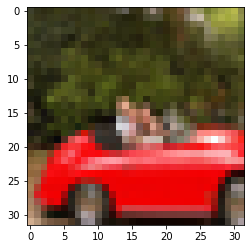

In [7]:
plt.imshow(img)

In [8]:
from torchvision import transforms
dir(transforms)

['AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [9]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [10]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())

In [11]:
img_t,_ = tensor_cifar10[99]
type(img_t)

torch.Tensor

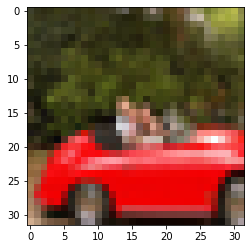

In [12]:
plt.imshow(img_t.permute(1,2,0))
plt.show()

In [13]:
import torch

In [14]:
imgs = torch.stack([img_t for img_t,_ in tensor_cifar10],dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [15]:
imgs.view(3,-1).mean(1)

tensor([0.4914, 0.4822, 0.4465])

In [16]:
imgs.view(3,-1).std(1)

tensor([0.2470, 0.2435, 0.2616])

In [17]:
transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

In [18]:
transformed_cifar10 = datasets.CIFAR10(data_path,download=False,train=True, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


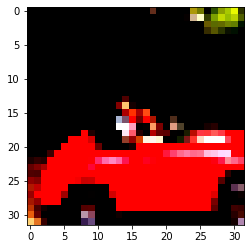

In [19]:
img_t,_ = transformed_cifar10[99]

plt.imshow(img_t.permute(1,2,0))
plt.show()

In [20]:
label_map={0:0,2:1}
class_names = ['airplane','bird']
cifar2 = [(img,label_map[label]) for img,label in cifar10 if label in [0,2]]
cifar2_val = [(img,label_map[label]) for img,label in cifar10_val if label in [0,2]]

In [27]:
transformed_cifar10[99]

(tensor([[[-1.0051, -1.1956, -1.2591,  ...,  0.6620,  0.9160,  0.1856],
          [-0.9892, -1.1163, -1.1639,  ...,  0.5984,  0.7255,  0.3127],
          [-1.0686, -0.9734, -1.1004,  ...,  0.4397,  0.3920, -0.0366],
          ...,
          [ 0.7413,  0.2809,  0.0745,  ..., -0.4971,  0.2492,  0.2174],
          [ 0.9160,  0.3920, -0.7193,  ..., -0.7035,  0.1539,  0.2809],
          [ 1.3288,  0.9001,  0.2174,  ..., -1.0527,  0.0745,  0.6937]],
 
         [[-0.9496, -1.1750, -1.2717,  ...,  0.7898,  0.9830,  0.2100],
          [-0.9335, -1.1267, -1.1750,  ...,  0.7415,  0.8220,  0.3710],
          [-0.9818, -0.9174, -1.0140,  ...,  0.5160,  0.4999,  0.0812],
          ...,
          [ 0.1939, -0.2087, -1.0784,  ..., -0.7724, -0.2409, -0.2893],
          [ 0.3710, -0.0799, -0.9496,  ..., -0.8207, -0.0799,  0.0328],
          [ 0.8220,  0.4516, -0.2248,  ..., -1.1106, -0.0638,  0.5321]],
 
         [[-1.0472, -1.3170, -1.4220,  ..., -0.6724, -0.5675, -0.6275],
          [-1.1521, -1.3170,

In [29]:
import torch.nn as nn
from collections import OrderedDict

n_out = 2

model = nn.Sequential(OrderedDict([
    ('hidden_linear',nn.Linear(32*32*3,512)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear',nn.Linear(512,n_out)),
    ('softmax_layer',nn.Softmax(1))
]))

In [32]:
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [33]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [37]:
cifar2 = [(img,label_map[label]) for img, label in cifar10 if label in [0,2]]
cifar2_val = [(img,label_map[label]) for img, label in cifar10_val if label in [0,2]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


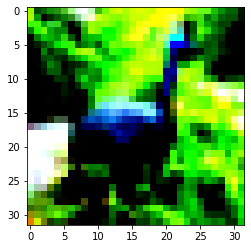

In [38]:
img,_ = cifar2[0]
plt.imshow(img.permute(1,2,0))
plt.show()

In [42]:
out = model(img.view(-1).unsqueeze(0))

In [44]:
out.argmax(1)

tensor([1])

In [46]:
model = nn.Sequential(
    nn.Linear(32*32*3,512),
    nn.Tanh(),
    nn.Linear(512,2),
    nn.LogSoftmax(1)
)

In [47]:
loss = nn.NLLLoss()

In [54]:
img,label = cifar2[0]

out = model(img.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

tensor(0.7285, grad_fn=<NllLossBackward0>)

In [50]:
import torch
import torch.optim as optim
import torch.nn as nn

In [51]:
model = nn.Sequential(
    nn.Linear(32*32*3,512),
    nn.Tanh(),
    nn.Linear(512,2),
    nn.LogSoftmax(1)
)

learning_rate = 1e-2

In [52]:
optimizer = optim.SGD(model.parameters(),learning_rate)
n_epochs=100

In [59]:
loss_fn = nn.NLLLoss()

In [60]:
for epoch in range(1,n_epochs+1):
    for img,label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out,torch.tensor([label]))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f "%(epoch,float(loss)))

Epoch: 1, Loss: 5.636043 
Epoch: 2, Loss: 4.634599 
Epoch: 3, Loss: 5.912657 
Epoch: 4, Loss: 8.508039 
Epoch: 5, Loss: 3.944094 
Epoch: 6, Loss: 13.109772 
Epoch: 7, Loss: 6.264794 
Epoch: 8, Loss: 9.935025 
Epoch: 9, Loss: 8.116928 
Epoch: 10, Loss: 4.439807 
Epoch: 11, Loss: 2.544659 
Epoch: 12, Loss: 5.463986 
Epoch: 13, Loss: 4.432723 
Epoch: 14, Loss: 2.411733 
Epoch: 15, Loss: 12.416996 
Epoch: 16, Loss: 3.000424 
Epoch: 17, Loss: 7.118988 
Epoch: 18, Loss: 5.249023 
Epoch: 19, Loss: 1.916936 
Epoch: 20, Loss: 10.292840 
Epoch: 21, Loss: 7.203418 
Epoch: 22, Loss: 0.781157 
Epoch: 23, Loss: 0.011192 
Epoch: 24, Loss: 1.897991 
Epoch: 25, Loss: 2.974716 
Epoch: 26, Loss: 8.563595 
Epoch: 27, Loss: 0.318869 
Epoch: 28, Loss: 6.458594 
Epoch: 29, Loss: 6.637285 
Epoch: 30, Loss: 10.952717 
Epoch: 31, Loss: 9.768766 
Epoch: 32, Loss: 2.845790 
Epoch: 33, Loss: 8.730083 
Epoch: 34, Loss: 10.438941 
Epoch: 35, Loss: 9.416860 
Epoch: 36, Loss: 3.026247 
Epoch: 37, Loss: 12.017372 
Epoc

In [61]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,shuffle=False)

In [62]:
correct =0
total=0

with torch.no_grad():
    for imgs,labels in val_loader:
        batch_size=  imgs.shape[0]
        outputs = model(imgs.view(batch_size,-1))
        _,predicted = torch.max(outputs,1)
        total+=labels.shape[0]
        correct +=int((predicted==labels).sum())
print("Accuracy: ",correct/total)

Accuracy:  0.7245
